 <font size=6>HAT-P-7b TRANSIT CURVE

HAT-P-7 is a F type main sequnce star with a single planet detect in it's system . HAT-P-7b is the planet with designation Kepler-2b 

In [1]:
## Importing the packages 
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

After importing the required packages we use __".search_targetpixelfile()"__ to download the data of file required. usually we can specifey its data type either kepler or TESS

In [2]:
pf=lk.search_targetpixelfile("HAT-P-7", author="kepler")
pf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 03,2009,Kepler,60,kplr010666592,0.0
1,Kepler Quarter 00,2009,Kepler,60,kplr010666592,0.0
2,Kepler Quarter 03,2009,Kepler,60,kplr010666592,0.0
3,Kepler Quarter 01,2009,Kepler,60,kplr010666592,0.0
4,Kepler Quarter 02,2009,Kepler,60,kplr010666592,0.0
5,Kepler Quarter 02,2009,Kepler,60,kplr010666592,0.0
6,Kepler Quarter 02,2009,Kepler,60,kplr010666592,0.0
7,Kepler Quarter 03,2009,Kepler,60,kplr010666592,0.0
8,Kepler Quarter 03,2009,Kepler,1800,kplr010666592,0.0


_The data is in a table format in which I selected the last one as it is the recent one. The selected data(that is last row) is converted into a pixel file which is the plotted with a frame number of 1000_  

E:\anaconda3\Lib\site-packages\astropy\io\fits\fitsrec.py:693: UserWarning: Field 12 has a repeat count of 0 in its format code, indicating an empty field.
  warnings.warn(


<Axes: title={'center': 'Target ID: 10666592, Cadence: 71988'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

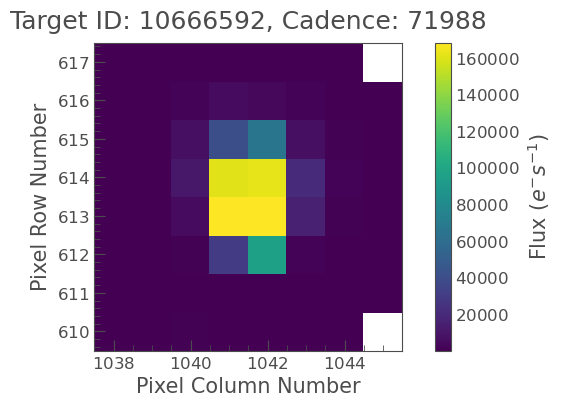

In [3]:
p1f=pf[66].download(quality_mask="hardest")
p1f.plot(frame=1000)

### Drawing the light curves 

The pixel file is converted into light curve using __".to_lightcurve()"__ the aperture_mask is set to all so that we can get a maximum result. Then the flatten so that it would be easy to analyze by using __".flatten()"__

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

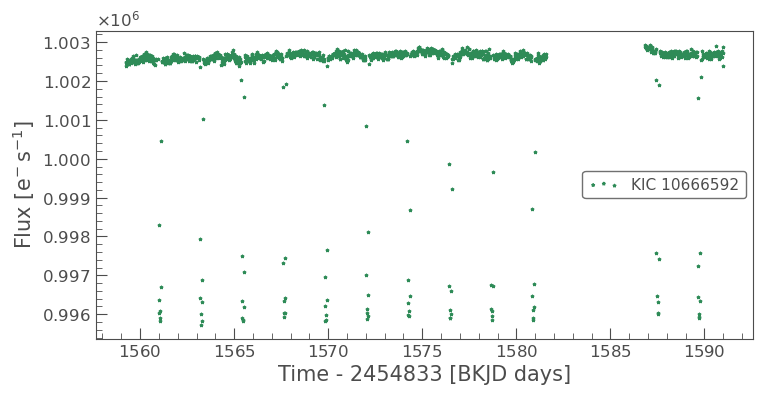

In [4]:
lc= p1f.to_lightcurve(aperture_mask='all')
lc.scatter(marker='*', color='seagreen')

(1558.0, 1583.0)

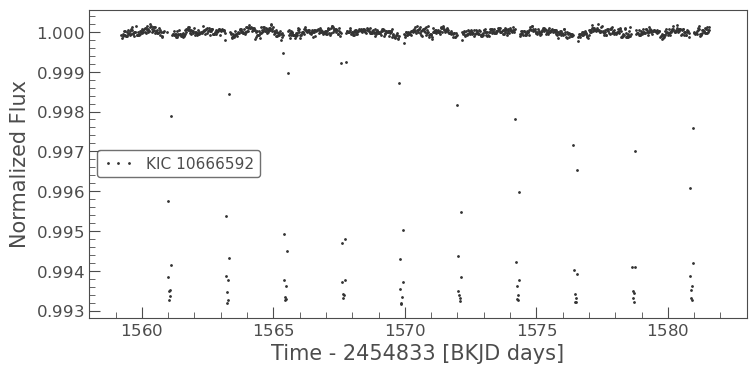

In [5]:
flat_lc= lc.flatten(window_length=411).remove_outliers()
flat_lc.plot(linewidth=0, marker='.')
plt.xlim(1558, 1583)

As we can see from the graph there is periodic decrease of flux of the star. this could mean many reasons. Star could be a plusating one, but from the various other process like spectroscopy and photometry. we need to find the  time period to do that we use periodogram with box-fitting least square method. BLS method  is an  algorithm that analyzes stellar photometric time series to search for periodic transits of extrasolar planets. 

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

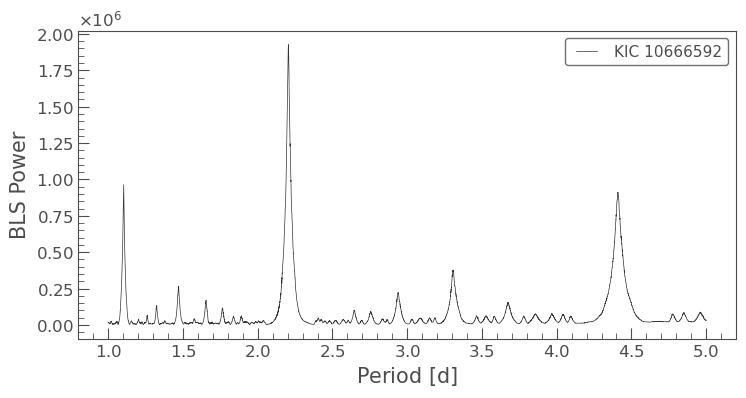

In [6]:
pdg= flat_lc.to_periodogram(method='bls', period=np.linspace(1,5,10000), frequency_factor=500)
pdg.plot()

In [7]:
bft=pdg.period_at_max_power
pbt0=pdg.transit_time_at_max_power
pd = pdg.duration_at_max_power
bft,pbt0,pd

(<Quantity 2.20492049 d>,
 <Time object: scale='tdb' format='bkjd' value=1561.0510568584825>,
 <Quantity 0.15 d>)

The variables:
1. bft= orbital period of planet
2. pbt0= transitting time 

Using the __bft__ we fold our lighcurve by using __".fold()"__ . The period is give as bft and epoch time is pbt0 

(-0.5, 0.5)

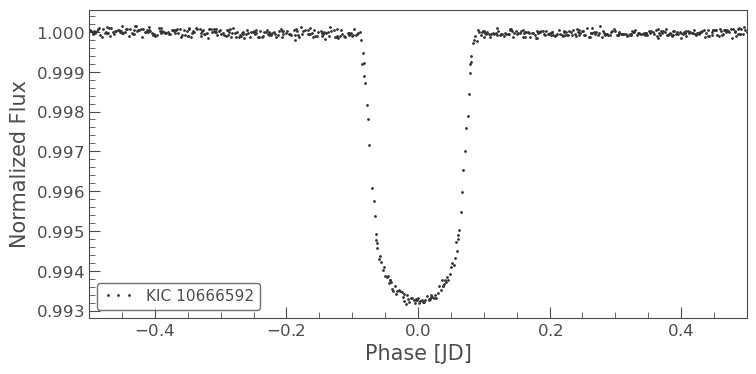

In [8]:
folded_lc=flat_lc.fold(period=bft, epoch_time=pbt0)
folded_lc.plot(linewidth=0, marker='.')
plt.xlim(-0.5, 0.5)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

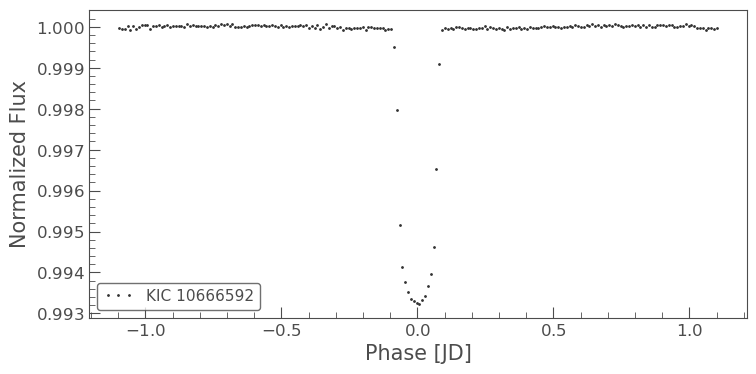

In [9]:
binned_lc= folded_lc.bin(15/24/60)
binned_lc.plot(linewidth=0, marker='.')

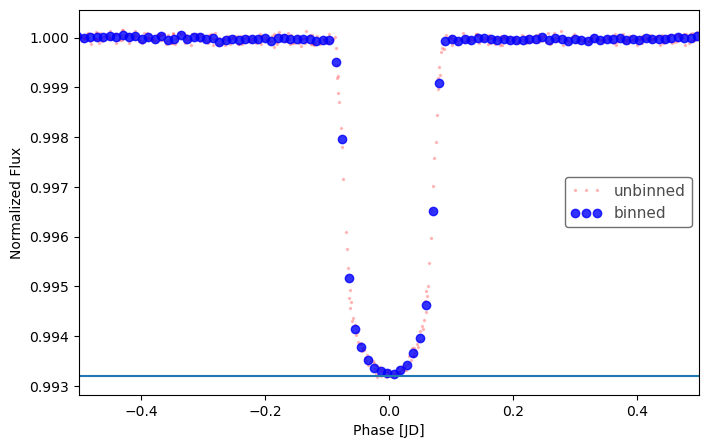

In [10]:
fig, ax = plt.subplots(figsize = (8,5))

folded_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3, label = 'unbinned')
binned_lc.plot(ax = ax, marker = 'o', linewidth = 0, color = 'blue', alpha = 0.8, markersize = 6, label = 'binned')

plt.xlim(-0.5, 0.5)
plt.axhline(.9932)

the binned plot is plot of the same light curve but it takes an average value of every point and gives a curve. Both curves are plotted on same graph. Now we draw a horizantal line by just a trial and guess. in above plot we draw at $0.9932$ . This gives the depth of transit curve $0.0068$

### RAIDUS OF PLANET

In [11]:
import astropy.units  as u 

In [12]:
transit_depth=1-.9932
rstar=1.99356*u.Rsun
rplanet=(np.sqrt(transit_depth))*rstar
rplanet

<Quantity 0.16439317 solRad>

In [13]:
rplanet1= rplanet.to(u.Rjup)
print("The raidus of planet is", rplanet1)

The raidus of planet is 1.5997360220346684 jupiterRad


#### ABSOLUTE MAGNITUDE

In [14]:
appar_mag=10.46
dist_in_parsec=344
absol_mag=(appar_mag+5)-(5*(np.log10(dist_in_parsec)))
absol_mag

2.777207787142352

##### LUMINOSITY

In [15]:
import astropy.constants as c
lumin=(10 ** (absol_mag/(-2.5)))*c.L_bol0
lumin_star=(lumin/c.L_sun)
lumino=lumin_star*u.Lsun
print('The luminosity of star  in terms of luminosity of sun is ',lumino)

The luminosity of star  in terms of luminosity of sun is  6.096986855272813 solLum


#### MASS OF THE STAR

In [16]:
mass_star=(lumin_star ** (1/3.5))*u.Msun
print("The mass of star in terms of mass of sun is  ",mass_star)

The mass of star in terms of mass of sun is   1.6761722459977184 solMass
